In [1]:
import seaborn as sns
sns.set_style("whitegrid")
from process_model import *
from fit_process import *
from scipy.stats import norm
from scipy.stats.mstats import mquantiles
import pickle

PARS = {'theta': [0, 200],
        'p_stay': [0, 1, .1],
        'p_fixed': [0, 1, .1],
        'p_stop_geom': [0, 1, .5],
        'tau': [.001, 50],
        'tau_unif': [0, 1],
        'prelec_gamma': [.01, 3],
        'prelec_elevation': [.01, 3],
        'prelec_gamma_loss': [.01, 3],
        'prelec_elevation_loss': [.01, 3],
        'pow_gain': [0., 5],
        'w_loss': [0., 10],
        'phi': [0, 100]}

# Load data

In [10]:
data = pd.read_csv('/Users/markant/code/ChaseExp/markant_trialdata.csv', index_col=0)
probdf = pd.read_csv('/Users/markant/experiments/exp_chase/chase-v3/static/problems_normal.csv', index_col=0)
probdf['mn_diff'] = probdf['mn_B'] - probdf['mn_A']
probdf['variance'] = probdf['var_A'] # matched variance in both options

problems = {}
for i, row in probdf.iterrows():
    problems[row['id']] = np.array([[row['mn_A'], row['var_A']], 
                                    [row['mn_B'], row['var_B']]])
    
problems_obsvar = {}
for pid in problems:
    obs_var = []
    mu = problems[pid][:,0]
    sigma2 = problems[pid][:,1]/2.
    problems_obsvar[pid] = np.array([[mu[0], sigma2[0]], [mu[1], sigma2[1]]])
    
problems = problems_obsvar

In [11]:
data.head()

,subject,problem,cond_cost,cond_var,cond_color,trial,option,outcome,choice
0,91,normal-37,high,high,diff,0,0,38,0
1,91,normal-55,low,high,diff,0,0,21,1
2,91,normal-55,low,high,diff,1,1,65,1
3,91,normal-55,low,high,diff,2,1,51,1
4,91,normal-4,low,low,diff,0,0,38,0


In [54]:
obs = data[(data.subject==92)]

In [55]:
obs

,subject,problem,cond_cost,cond_var,cond_color,trial,option,outcome,choice
38,92,normal-37,high,high,same,0,0,97,0
39,92,normal-37,high,high,same,1,0,26,0
40,92,normal-37,high,high,same,2,1,81,0
41,92,normal-37,high,high,same,3,1,55,0
42,92,normal-37,high,high,same,4,1,19,0
43,92,normal-37,high,high,same,5,0,20,0
44,92,normal-14,high,low,same,0,0,57,1
45,92,normal-14,high,low,same,1,0,54,1
46,92,normal-14,high,low,same,2,1,60,1
47,92,normal-14,high,low,same,3,1,67,1


In [78]:
pid = 'normal-3'

pars = {'pref_units': 'diffs',
        'tau': 20,
        'N': 50,
        'c': 45,
        'r': 0.02,
        'theta': 80}

m = CHASEProcessModel(problemtype='normal',
                      startdist='laplace')

r = m(problems[pid], pars, obs=data[(data.subject==92) & (data.problem==pid)])

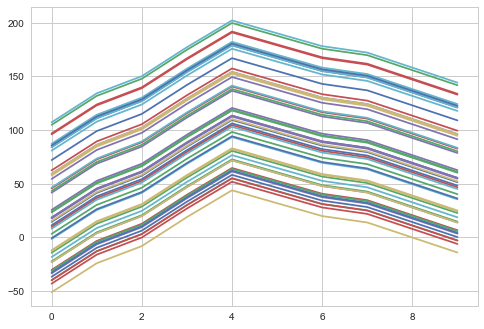

In [79]:
plt.plot(r['traces'].transpose())
plt.show()

In [86]:
pars = {'pref_units': 'diffs',
        'tau': 50,
        'N': 1000,
        'c': 45,
        'r': 0.04,
        'theta': 80,
        'knownobs': True}

m = CHASEProcessModel(problemtype='normal',
                      startdist='laplace')

m.nloglik(problems, data[(data.subject==92)], pars)

412.89811332933937

# Load data

In [8]:
data = pd.read_csv('paper/data/markant/results_v3.csv', index_col=0)
data.rename(columns={'sid': 'subject', 'probid': 'problem'}, inplace=True)
data['choice'] = data.choice.apply(lambda c: 1 if c=='B' else 0)

probdf = pd.read_csv('/Users/markant/experiments/exp_chase/chase-v3/static/problems_normal.csv', index_col=0)
probdf['mn_diff'] = probdf['mn_B'] - probdf['mn_A']
probdf['variance'] = probdf['var_A'] # matched variance in both options

problems = {}
for i, row in probdf.iterrows():
    problems[row['id']] = np.array([[row['mn_A'], row['var_A']], 
                                    [row['mn_B'], row['var_B']]])
    
problems_obsvar = {}
for pid in problems:
    obs_var = []
    mu = problems[pid][:,0]
    sigma2 = problems[pid][:,1]/2.
    problems_obsvar[pid] = np.array([[mu[0], sigma2[0]], [mu[1], sigma2[1]]])
    
problems = problems_obsvar

In [209]:
data['p_switch'] = data.n_switch / (data.samplesize - 1)
data.loc[np.isnan(data['p_switch']), 'p_switch'] = 0.

In [211]:
data.p_switch.mean()

0.5376765232865205

# Fit

In [5]:
PARSETS = {}
PARSETS['optional'] = [#['theta', 'theta(cost=high)', 'tau', 'pow_gain'],
                       ['theta(cost=low)', 'theta(cost=high)', 'tau(cond_color=same)', 'tau(cond_color=diff)', 'pow_gain'],
                       #['theta', 'p_stay', 'tau', 'tau(cond_color=diff)', 'sc'],
                       #['theta', 'theta(cost=high)', 'p_stay', 'tau', 'sc'],
                       #['theta', 'p_stay', 'tau', 'prelec_gamma'],
                       #['theta', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
                       #['theta', 'p_stay', 'tau', 'pow_gain'],
                       #['theta', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
                       ]

PARSETS['geometric'] = [['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'tau(cond_color=diff)', 'sc'],
                        #['p_stop', 'p_stay', 'tau', 'tau(cond_color=diff)', 'sc'],
                        #['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'sc'],
                        #['p_stop', 'p_stay', 'tau', 'prelec_gamma'],
                        #['p_stop', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
                        #['p_stop', 'p_stay', 'tau', 'pow_gain'],
                        #['theta', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
                        ]

FIXED = {}
for pref_units in ['sums', 'diffs']:
    FIXED[('optional',pref_units)] = {'pref_units': pref_units,
                                      'stoprule': 'optional',
                                      'N': 1000,
                                      'knownobs': True}

    FIXED[('geometric',pref_units)] = {'pref_units': pref_units,
                                       'stoprule': 'geometric',
                                       'theta': 30}
    
cp = {}
bf_cp = {}
bf_par = {}
msd_cp = {}
quant = {}
bf_quant = {}

cp_asc = {}
bf_cp_asc = {}

N_ITER = 1

In [9]:
data.head()

,subject,gameind,problem,probvar,cond_color,cond_ecology,cost,samplesize,n_switch,choice,choseH,mn_diff
0,91,0,normal-37,high,diff,normal,high,1,0,0,0,9
1,91,1,normal-55,high,diff,normal,low,3,1,1,1,14
2,91,2,normal-4,low,diff,normal,low,1,0,0,0,7
3,91,3,normal-15,low,diff,normal,high,2,1,1,1,7
4,91,4,normal-52,high,diff,normal,low,2,1,0,0,14


In [12]:
SIM_ID = 'process_knownobs_markant'
OUTDIR = 'process_knownobs_fitresults_markant'

F = FIXED[('optional', 'diffs')]

PARSETS = [['theta(cond_cost=low)', 'theta(cond_cost=high)', 
            'tau(cond_color=same)', 'tau(cond_color=diff)', 'c', 'r'],
           ]
m = CHASEProcessModel(problems=problems,
                      problemtype='normal',
                      startdist='laplace')

In [15]:
for parset in PARSETS:
    fitting = parset
    results = fit_mlh(m, problems, data, 
                      SIM_ID, F, fitting, ftol=.1, niter=N_ITER, outdir=OUTDIR)

c	r	tau(cond_color=diff)	tau(cond_color=same)	theta(cond_cost=high)	theta(cond_cost=low)
[  2.78200000e+01   4.00000000e-02   2.50200000e+01   6.52000000e+00
   4.27990000e+02   4.47580000e+02] 10313.9
[  93.2     0.     19.02   67.92  215.79   67.87] 50816.7
[  6.08000000e+00   3.00000000e-02   5.19200000e+01   8.80600000e+01
   4.66370000e+02   4.56010000e+02] 6582.7
[  9.36000000e+01   2.00000000e-02   2.20700000e+01   6.45500000e+01
   4.05660000e+02   3.06190000e+02] 11352.5
[  3.68900000e+01   7.00000000e-02   1.18400000e+01   5.33700000e+01
   1.55110000e+02   1.41460000e+02] 24966.8
[  9.11400000e+01   7.00000000e-02   1.26000000e+01   5.52700000e+01
   1.33460000e+02   1.13390000e+02] 50505.5
[  7.01600000e+01   5.00000000e-02   5.58200000e+01   6.95700000e+01
   1.61300000e+01   4.79180000e+02] 34656.7
[  9.44400000e+01   6.00000000e-02   7.56900000e+01   2.64400000e+01
   3.27460000e+02   2.07030000e+02] 31144.6
[  3.63200000e+01   2.00000000e-02   8.74300000e+01   1.5670000

In [31]:
fitting = PARSETS[0]
best = best_result(SIM_ID, F, fitting, outdir=OUTDIR)
pred = predict_from_result(m, problems, data, SIM_ID, F, 
                           fitting = fitting, 
                           outdir=OUTDIR)
print best

index                                                                    0
Unnamed: 0                                                               0
iteration                                                                0
success                                                               True
nllh                                                               898.091
k                                                                        6
N                                                                    14513
bic                                                                1853.68
c                                                                  35.8502
r                                                                0.0016061
tau(cond_color=diff)                                             0.0511179
tau(cond_color=same)                                             0.0665998
theta(cond_cost=high)                                              324.925
theta(cond_cost=low)     

In [38]:
pred.groupby(['cond_cost', 'cond_var']).apply(lambda d: d.choice.mean())

cond_cost  cond_var
high       high        0.630294
           low         0.876309
low        high        0.701332
           low         0.941974
dtype: float64

In [37]:
pred.groupby(['cond_cost', 'cond_var']).apply(lambda d: d.bf_cp.mean())

cond_cost  cond_var
high       high        0.776534
           low         0.787872
low        high        0.800798
           low         0.844881
dtype: float64

In [46]:
bf_par[SIM_ID] = best

cp[SIM_ID] = data.groupby('problem').apply(lambda d: np.mean(d.choice))
bf_cp[SIM_ID] = pred.groupby('problem').apply(lambda d: np.mean(d.cp))

quant[SIM_ID] = mquantiles(data.samplesize)
bf_quant[SIM_ID] = pred[['ss(.25)', 'ss(.5)', 'ss(.75)']].mean().values

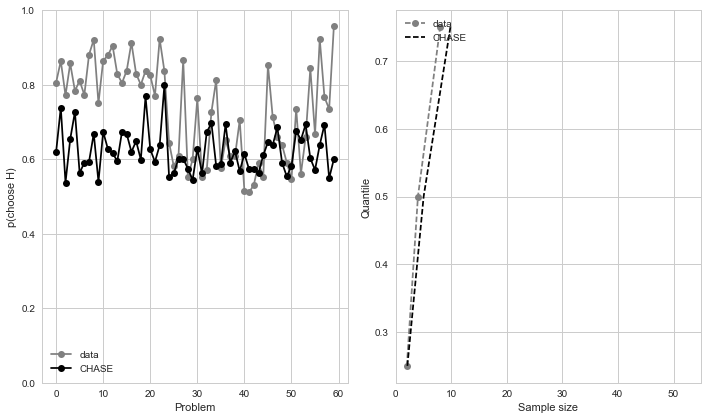

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
axi = ax[0]
axi.plot(cp[SIM_ID].values, '-o', color='gray', label='data')
axi.plot(bf_cp[SIM_ID].values, '-o', color='black', label='CHASE')
axi.set_ylim(0, 1)
#axi.set_xlim(0, 7)
#axi.set_xticks(range(1,7))
axi.set_xlabel('Problem')
axi.set_ylabel('p(choose H)')
axi.legend()

axi = ax[1]
axi.plot(quant[SIM_ID], [.25, .5, .75], '--o', color='gray', label='data')
axi.plot(bf_quant[SIM_ID], [.25, .5, .75], '--x', color='black', label='CHASE')

axi.set_xlim(0, 55)
axi.legend(loc='upper left')
axi.set_xlabel('Sample size')
axi.set_ylabel('Quantile')

plt.tight_layout()
plt.show()

# Individual fits

In [126]:
PARSETS = {}
PARSETS['optional'] = [
                       ['r', 'theta(cost=low)', 'theta(cost=high)', 'tau', 'pow_gain'],
                       ]

PARSETS['geometric'] = [['p_stop_geom(cost=low)', 'p_stop_geom(cost=high)', 'tau', 'pow_gain'],
                        ]

FIXED = {}
for pref_units in ['sums', 'diffs']:
    FIXED[('optional',pref_units)] = {'pref_units': pref_units,
                                      'stoprule': 'optional',
                                      'max_T': 1000,
                                      'N': 10000,
                                      'c': 45}

    FIXED[('geometric',pref_units)] = {'pref_units': pref_units,
                                       'stoprule': 'fixedGeom',
                                       'N': 10000,
                                       'max_T': 1000,
                                       'c': 45}

In [73]:
import sys

In [223]:
sys.path.append('./scripts')
from run_markant import *

cp = {}
bf_cp = {}
quant = {}
bf_quant = {}

In [212]:
data.subject.unique()

array([ 91,  92,  93,  94,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119,
       120, 121, 123, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153,
       154, 155, 158, 159, 161, 162, 163, 166, 169, 170, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 183, 184, 186, 188, 190, 191, 192,
       194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 213, 214, 215, 216, 217, 218])

In [247]:
results = pd.DataFrame([], columns=['sim_id', 'sid', 'cond_color', 'stoprule', 'k', 'N', 'nllh', 'bic', 
                                    'tau',
                                    'theta(cost=low)', 'theta(cost=high)', 
                                    'p_stop_geom(cost=low)', 'p_stop_geom(cost=high)',
                                    'sc', 'r', 'pow_gain'])

for sid in [91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114]:
    cond_color = data.loc[data.subject==sid]['cond_color'].values[0]
    
    b = best(sid, 'optional', ['r', 'theta(cost=low)', 'theta(cost=high)', 'tau', 'pow_gain'])
    b['sid'] = sid
    b['stoprule'] = 'optional'
    b['cond_color'] = cond_color
    results.loc[results.shape[0]] = b
    
    b = best(sid, 'geometric', ['p_stop_geom(cost=low)', 'p_stop_geom(cost=high)', 'tau', 'pow_gain'])
    b['sid'] = sid
    b['stoprule'] = 'geometric'
    b['cond_color'] = cond_color
    results.loc[results.shape[0]] = b

In [248]:
results

,sim_id,sid,cond_color,stoprule,k,N,nllh,bic,tau,theta(cost=low),theta(cost=high),p_stop_geom(cost=low),p_stop_geom(cost=high),sc,r,pow_gain
0,"process_markant_individual_subj91(pow_gain,r,t...",91.0,diff,optional,5.0,24.0,46.346526,108.583322,58.449602,1.047157,0.931010,NaN,NaN,NaN,0.083166,0.036391
1,process_planned_markant_individual_subj91(p_st...,91.0,diff,geometric,4.0,24.0,40.863211,94.438638,18.840189,NaN,NaN,0.619952,0.645026,NaN,NaN,0.020973
2,"process_markant_individual_subj92(pow_gain,r,t...",92.0,same,optional,5.0,24.0,65.755103,147.400475,0.158384,24.945208,7.960704,NaN,NaN,NaN,0.029405,0.452865
3,process_planned_markant_individual_subj92(p_st...,92.0,same,geometric,4.0,24.0,77.618076,167.948368,60.805216,NaN,NaN,0.070082,0.226814,NaN,NaN,1.342950
4,"process_markant_individual_subj93(pow_gain,r,t...",93.0,same,optional,5.0,24.0,59.605910,135.102089,1.721048,61.326793,22.089762,NaN,NaN,NaN,0.038606,1.025984
5,process_planned_markant_individual_subj93(p_st...,93.0,same,geometric,4.0,24.0,60.810213,134.332642,82.389968,NaN,NaN,0.149501,0.406700,NaN,NaN,1.223964
6,"process_markant_individual_subj94(pow_gain,r,t...",94.0,diff,optional,5.0,24.0,67.935107,151.760482,0.795461,18.863740,11.078494,NaN,NaN,NaN,0.077053,0.476242
7,process_planned_markant_individual_subj94(p_st...,94.0,diff,geometric,4.0,24.0,72.878584,158.469384,20.689021,NaN,NaN,0.147769,0.196437,NaN,NaN,1.488835
8,"process_markant_individual_subj96(pow_gain,r,t...",96.0,same,optional,5.0,24.0,62.747582,141.385433,57.662467,48.567296,53.090071,NaN,NaN,NaN,0.071197,1.395410
9,process_planned_markant_individual_subj96(p_st...,96.0,same,geometric,4.0,24.0,55.781761,124.275736,85.355326,NaN,NaN,0.452508,0.454359,NaN,NaN,0.022253


In [262]:
comp = results.groupby('sid').apply(lambda d: d[d.stoprule=='optional']['bic'].values[0] < d[d.stoprule=='geometric']['bic'].values[0])
n_opt = np.sum(comp.values)
n_geom = comp.shape[0] - n_opt
print n_opt, n_opt/float(comp.shape[0])
print n_geom, n_geom/float(comp.shape[0])

13 0.590909090909
9 0.409090909091


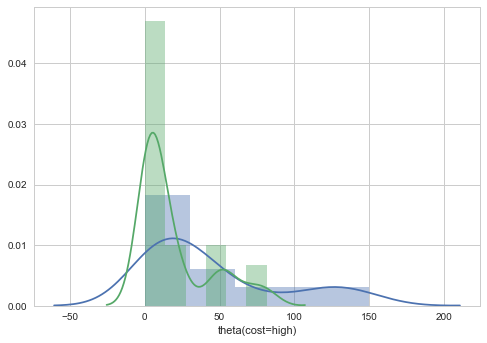

In [251]:
optional = results[results.stoprule=='optional']
sns.distplot(optional['theta(cost=low)'])
sns.distplot(optional['theta(cost=high)'])

In [263]:
sid = 113
sdata = data[data.subject==sid]
pred = predict(sid, sdata, problems,
               'optional', ['r', 'theta(cost=low)', 'theta(cost=high)', 'tau', 'pow_gain'])

index                                                               0
Unnamed: 0                                                          0
iteration                                                           0
success                                                          True
nllh                                                          26.0457
k                                                                   5
N                                                                  24
bic                                                           67.9817
pow_gain                                                      1.37147
r                                                           0.0930729
tau                                                           77.5898
theta(cost=high)                                             0.136921
theta(cost=low)                                              0.176174
sim_id              process_markant_individual_subj113(pow_gain,r,...
Name: 0, dtype: obje

In [209]:
sdata = sdata.merge(pred, on='problem')

In [213]:
#bf_par[sid] = best

cp[sid]       = sdata.groupby('problem').apply(lambda d: np.mean(d.choice))
bf_cp[sid]    = pred.groupby('problem').apply(lambda d: np.mean(d.cp))

quant[sid]    = mquantiles(sdata.samplesize)
bf_quant[sid] = pred[['ss(.25)', 'ss(.5)', 'ss(.75)']].mean().values

In [215]:
sdata

,subject,gameind,problem,probvar,cond_color,cond_ecology,cost,samplesize,n_switch,choice,choseH,mn_diff,stoprule,pow_gain,max_T,N,r,pref_units,tau,theta,cp,ss(.25),ss(.5),ss(.75)
0,93,0,normal-33,high,same,normal,high,2,1,1,1,11,optional,1.025984,1000,10000,0.038606,diffs,1.721048,22.089762,0.621,1.0,1.0,2.0
1,93,1,normal-45,high,same,normal,low,14,2,1,1,9,optional,1.025984,1000,10000,0.038606,diffs,1.721048,61.326793,0.634,2.0,3.0,6.0
2,93,2,normal-6,low,same,normal,low,8,1,1,1,11,optional,1.025984,1000,10000,0.038606,diffs,1.721048,61.326793,0.998,5.0,8.0,12.0
3,93,3,normal-25,low,same,normal,high,3,1,1,1,14,optional,1.025984,1000,10000,0.038606,diffs,1.721048,22.089762,0.785,1.0,2.0,3.0
4,93,4,normal-17,low,same,normal,high,2,1,1,1,5,optional,1.025984,1000,10000,0.038606,diffs,1.721048,22.089762,0.619,1.0,2.0,4.0
5,93,5,normal-14,low,same,normal,high,2,1,1,1,13,optional,1.025984,1000,10000,0.038606,diffs,1.721048,22.089762,0.720,1.0,2.0,3.0
6,93,6,normal-38,high,same,normal,high,2,1,0,0,13,optional,1.025984,1000,10000,0.038606,diffs,1.721048,22.089762,0.620,1.0,1.0,2.0
7,93,7,normal-43,high,same,normal,low,10,1,1,1,12,optional,1.025984,1000,10000,0.038606,diffs,1.721048,61.326793,0.690,2.0,4.0,6.0
8,93,8,normal-11,low,same,normal,low,6,1,1,1,14,optional,1.025984,1000,10000,0.038606,diffs,1.721048,61.326793,1.000,4.0,7.0,10.0
9,93,9,normal-10,low,same,normal,low,9,2,1,1,5,optional,1.025984,1000,10000,0.038606,diffs,1.721048,61.326793,0.658,3.0,6.0,10.0


In [217]:
sdata.groupby(['subject', 'probvar', 'cost']).apply(lambda d: d.cp.mean()).values

array([ 0.59966667,  0.654     ,  0.75033333,  0.92633333])

In [218]:
obs = sdata.groupby(['subject', 'probvar', 'cost']).apply(lambda d: d.choseH.mean()).reset_index()
obs.columns = ['subject', 'probvar', 'cost', 'choseH']
obs['bf_cp'] = sdata.groupby(['subject', 'probvar', 'cost']).apply(lambda d: d.cp.mean()).values
obs

,subject,probvar,cost,choseH,bf_cp
0,93,high,high,0.500000,0.599667
1,93,high,low,0.833333,0.654000
2,93,low,high,0.833333,0.750333
3,93,low,low,1.000000,0.926333


In [219]:
print mquantiles(sdata.samplesize)
print sdata[['ss(.25)', 'ss(.5)', 'ss(.75)']].mean().values

[ 2.  2.  6.]
[ 2.16666667  3.5         5.58333333]
